<a href="https://colab.research.google.com/github/Sarahhtamimi/CritterCare-Web-project/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 – Data Mining Techniques Application


## [1] Problem

This project aims to analyze and classify the impact of social media usage on the academic performance of undergraduate students. Using data mining techniques such as classification and clustering, we investigate how different patterns of social media behavior influence students' academic outcomes.


## [2] Data Mining Task

This project involves two main data mining tasks:

### • Classification
Used to predict the academic performance category of a student based on their social media usage.  
The goal is to build a model that can learn patterns from labeled data (Supervised).

### • Clustering
Used to discover groups of students with similar social media behavior without using the class label (Unsupervised).
This helps identify pattern.  

These tasks guide the techniques applied in later sections.


## [3] Data

The dataset used in this project is the **“Impact of Social Media on Academic Performance”** dataset from Kaggle.

*Kaggle:*
https://www.kaggle.com/datasets/aderonkeayobami/impact-of-social-media-on-academic-performances


- Format: Excel file (.xlsx)  
- Number of rows: **3028**  
- Number of columns: **47**  
- Class Label: **Impact on Academic Performance** (Likert scale 0–5)  

---

## Dataset Description  

### 1. Sample of the Dataset  
Below we show the first few rows of the dataset to get an overview of the structure.  

---

### 2. Number of Rows and Columns  
We calculate the total number of rows (instances) and columns (attributes/features).  

---

### 3. Data Types of Attributes  
We display the data types of each column to understand whether features are numeric, categorical, or binary.  
Most features are **binary (0/1)** indicating social media usage patterns, while the target column is **ordinal (Likert scale 0–5)**.  

---

### 4. Class Attribute Distribution  
We analyze the distribution of the **Impact on Academic Performance** column to see how many students fall into each category.  
This will help us check for **class imbalance** before moving to classification.  

In [ ]:
# @title Dataset Descrption:
#Export data from computer and read it
import pandas as pd
# While reading the file, we specify that the columns are separated by using sep=";"
df = pd.read_excel("/content/Raw_dataset.xlsx")
df.head()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
0,16,2,2,2,0,1,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,3.0,2.6
1,19,1,3,1,0,1,1,1,1,0,...,1,1,0,1,1,4,1.0,1.0,3.4,1.6
2,18,2,4,2,0,0,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,5.0,2.6
3,20,1,3,2,0,0,1,1,1,0,...,1,1,0,1,5,4,3.0,2.0,5.0,3.0
4,20,2,3,2,1,1,1,1,0,0,...,0,0,0,2,4,5,3.0,1.0,3.6,3.0


In [ ]:
#1. Number of attributes (rows and columns)
print("Number of rows",df.shape[0]) #instance
print("Number of columns",df.shape[1]) #attributes

Number of rows 3028
Number of columns 47


In [ ]:
#2.Data type of attributes
print(df.dtypes)

Age                                                  int64
Gender                                               int64
Year of Study                                        int64
Name of College                                      int64
Use Facebook                                         int64
Use Instagram                                        int64
Use Twitter                                          int64
Use Snapchat                                         int64
Use LinkedIn                                         int64
Use Tiktok                                           int64
Use Others                                           int64
Frequency of Use                                     int64
Time Spent                                           int64
Social Interaction                                   int64
Academic Purpose                                     int64
Entertainment                                        int64
Networking                                           int

In [ ]:
#3. Class attribute distribution and count of instance for each label
print(df["Impact on Academic Performance"].value_counts())

Impact on Academic Performance
3    747
5    713
1    561
4    523
2    462
0     22
Name: count, dtype: int64


In [ ]:
#4. Sample of the raw dataset
df.head()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
0,16,2,2,2,0,1,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,3.0,2.6
1,19,1,3,1,0,1,1,1,1,0,...,1,1,0,1,1,4,1.0,1.0,3.4,1.6
2,18,2,4,2,0,0,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,5.0,2.6
3,20,1,3,2,0,0,1,1,1,0,...,1,1,0,1,5,4,3.0,2.0,5.0,3.0
4,20,2,3,2,1,1,1,1,0,0,...,0,0,0,2,4,5,3.0,1.0,3.6,3.0


**Data Summarization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
df = pd.read_excel("Raw_dataset.xlsx")
print("Shape:", df.shape)
df.head()

Shape: (3028, 47)


,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
0,16,2,2,2,0,1,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,3.0,2.6
1,19,1,3,1,0,1,1,1,1,0,...,1,1,0,1,1,4,1.0,1.0,3.4,1.6
2,18,2,4,2,0,0,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,5.0,2.6
3,20,1,3,2,0,0,1,1,1,0,...,1,1,0,1,5,4,3.0,2.0,5.0,3.0
4,20,2,3,2,1,1,1,1,0,0,...,0,0,0,2,4,5,3.0,1.0,3.6,3.0


In [ ]:
raw_df = df.copy()   # make a copy of the final data before saving

# 1 . Data Analysis
****
**Statical Summary**

In [ ]:
df.describe()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
count,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,...,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000
mean,18.352378,1.424042,2.205086,1.476222,0.445178,0.782034,0.468296,0.524108,0.233157,0.625495,...,0.529723,1.244055,0.971268,3.469617,3.078930,3.243065,3.338111,2.950198,3.640819,3.215984
std,2.058045,0.502235,0.874640,0.619389,0.497068,0.454810,0.534244,0.499501,0.422911,0.484075,...,0.507728,1.674212,1.644333,1.589963,1.507621,1.555822,1.394496,1.482595,0.971860,1.011929
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.200000,3.000000,2.600000
50%,18.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,3.800000,3.000000,3.800000,3.200000
75%,19.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,4.600000,4.000000,4.400000,4.000000
max,48.000000,4.000000,5.000000,3.000000,1.000000,11.000000,11.000000,1.000000,1.000000,1.000000,...,2.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000


The statistical summary provides an overview of the dataset. For example, the Age attribute shows an average of around 18 years, which is reasonable since the dataset represents undergraduate students. However, the maximum value of 48 years indicates the presence of an outlier that should be considered during preprocessing.

Some attributes such as Gender and Name of College are shown as numerical values in the summary, but in reality, they are categorical features that have been encoded using numbers. Therefore, their mean and standard deviation are not meaningful and should be interpreted through frequency counts instead.

**Missing values**

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Year of Study,0
Name of College,0
Use Facebook,0
Use Instagram,0
Use Twitter,0
Use Snapchat,0
Use LinkedIn,0
Use Tiktok,0



The missing values analysis shows that there are no null or missing entries in the dataset. This is an advantage since it ensures the dataset is complete and reduces the need for imputation or dropping rows/columns. Having a complete dataset allows us to focus on other preprocessing tasks such as handling outliers, encoding categorical features, and normalization.


**Plots**
- Histogram (Age)

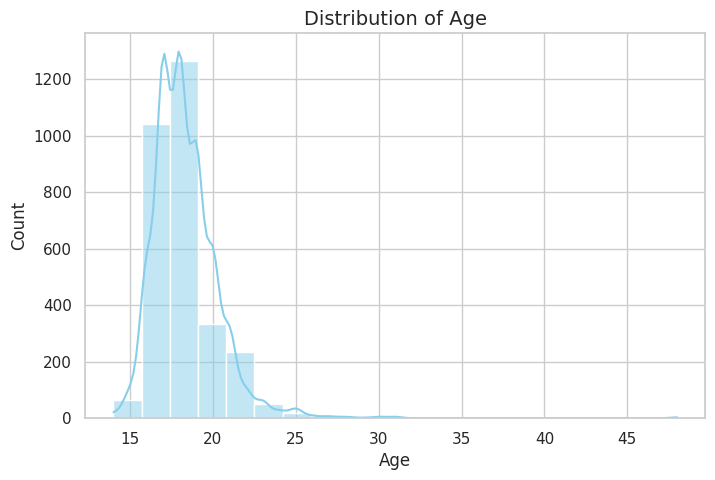

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The histogram above shows the distribution of students’ ages. Most students are between 17 and 20 years old, which is expected for undergraduate levels. The data is slightly right-skewed, meaning there are a few older participants aged above 25. This pattern confirms that the dataset mainly represents young students, while the presence of older ages (up to 48) might indicate outliers that should be checked during the preprocessing phase.



- Boxplot (Age)

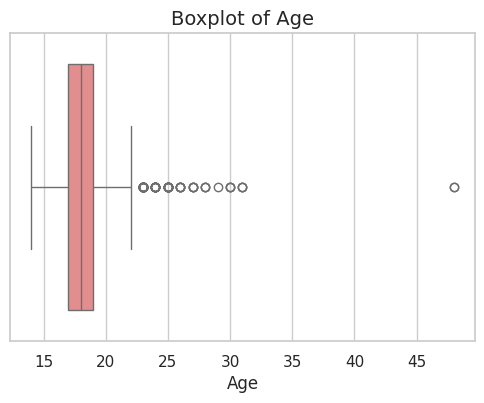

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Age"], color="lightcoral")
plt.title("Boxplot of Age", fontsize=14)
plt.xlabel("Age")
plt.show()


The boxplot of the Age attribute shows that the majority of students are between 17 and 20 years old, with a median age of 18. Several outliers are present, including values above 25 and one extreme case at 48 years, which may indicate data entry errors or older students. These outliers should be carefully considered during preprocessing.

- Barplot (gender)


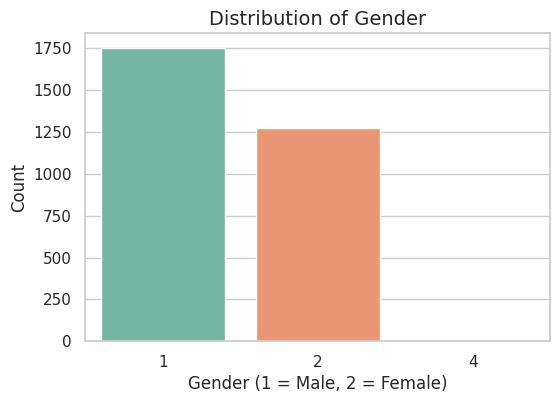

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="Gender", palette="Set2", legend=False)
plt.title("Distribution of Gender", fontsize=14)
plt.xlabel("Gender (1 = Male, 2 = Female)")
plt.ylabel("Count")
plt.show()


The bar plot of the Gender attribute shows the distribution of male and female students. The dataset indicates that there are more male students compared to female students. However, the appearance of an unexpected value (4) suggests the presence of data entry or coding errors that need to be addressed during preprocessing.

- Barplot (Use Instagram)

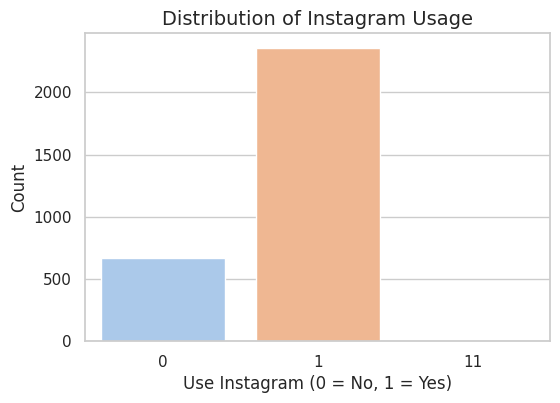

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Use Instagram", hue="Use Instagram", palette="pastel", legend=False)
plt.title("Distribution of Instagram Usage", fontsize=14)
plt.xlabel("Use Instagram (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The plot shows Instagram usage distribution: most students use Instagram (1), while fewer do not (0). One invalid entry (11) was detected, which should be corrected during preprocessing.

In [ ]:
print("Unique values in Use Instagram:", df["Use Instagram"].unique())

invalid_count = df[df["Use Instagram"] == 11].shape[0]
print("Number of invalid entries (11):", invalid_count)

Unique values in Use Instagram: [ 1  0 11]
Number of invalid entries (11): 1


**Class label distribution**

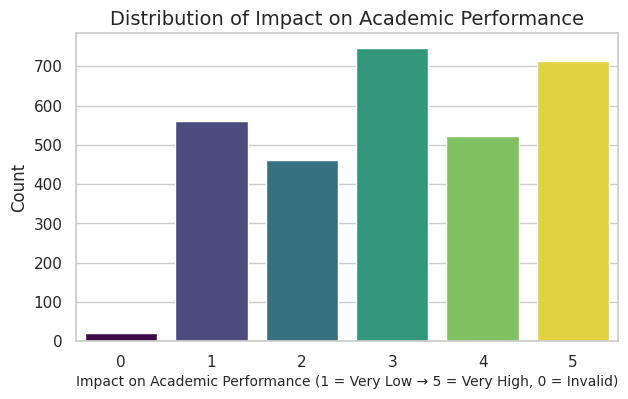

Impact on Academic Performance
3    747
5    713
1    561
4    523
2    462
0     22
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Impact on Academic Performance", hue="Impact on Academic Performance", palette="viridis", legend=False)
plt.title("Distribution of Impact on Academic Performance", fontsize=14)
plt.xlabel("Impact on Academic Performance (1 = Very Low → 5 = Very High, 0 = Invalid)", fontsize=10)
plt.ylabel("Count")
plt.show()

print(df["Impact on Academic Performance"].value_counts())


The plot shows the distribution of the class label Impact on Academic Performance. Most students fall between levels 2 to 5, with the highest counts at level 3 (747) and level 5 (713). Fewer students are at levels 1 (561) and 2 (462), while only 22 invalid entries (0) were detected. These invalid values will need to be handled during preprocessing.

## [4] Data Preprocessing

Before applying the data mining techniques, several preprocessing steps were performed in **Phase 2** to ensure the dataset was clean, consistent, and ready for analysis.

**- Removed Duplicates:** Identified and eliminated 160 duplicate entries.

**- Discretized Age:** Converted age column into categories (0, 1, 2) for modeling.

**- Square Root Transformation:** Applied square root transformation to the time spent column to smooth out differences.

**- Z-Score Normalization:** Normalized frequency of use to have mean=0 and std=1.

**- Min-Max Normalization:** Scaled academic performance impact to a 0-1 range.

**- Handled Invalid Values:** Replaced invalid values with NaN and filled them appropriately.

**- Outlier Handling:** Used IQR for numeric columns and median/mode for binary columns to handle outliers.

**- Feature Selection:** Selected 14 key columns for further analysis.

**- Snapshot Comparison:** Compared raw vs. processed data for clarity.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_raw = pd.read_excel("Raw_dataset.xlsx")
df=df_raw.copy()
print("shape:",df.shape)
df.head()

shape: (3028, 47)


,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
0,16,2,2,2,0,1,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,3.0,2.6
1,19,1,3,1,0,1,1,1,1,0,...,1,1,0,1,1,4,1.0,1.0,3.4,1.6
2,18,2,4,2,0,0,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,5.0,2.6
3,20,1,3,2,0,0,1,1,1,0,...,1,1,0,1,5,4,3.0,2.0,5.0,3.0
4,20,2,3,2,1,1,1,1,0,0,...,0,0,0,2,4,5,3.0,1.0,3.6,3.0


**Duplicates Removal (Cleaning data)**



In [ ]:
 #first we cheak for duplicates
dup_count = df.duplicated().sum()
print("Number of duplicates: ",dup_count)

print("Shape before removing duplicates: ", df.shape)
#removing the duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates: ", df.shape)

Number of duplicates:  166
Shape before removing duplicates:  (3028, 47)
Shape after removing duplicates:  (2862, 47)


In [ ]:
df.head()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
0,16,2,2,2,0,1,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,3.0,2.6
1,19,1,3,1,0,1,1,1,1,0,...,1,1,0,1,1,4,1.0,1.0,3.4,1.6
2,18,2,4,2,0,0,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,5.0,2.6
3,20,1,3,2,0,0,1,1,1,0,...,1,1,0,1,5,4,3.0,2.0,5.0,3.0
4,20,2,3,2,1,1,1,1,0,0,...,0,0,0,2,4,5,3.0,1.0,3.6,3.0


- We detected 166 duplicate rows and removed them using drop_duplicates(). This step prevents redundancy and ensures each record is unique. Result: Dataset reduced from 3028 to 2862 rows




**Variable transformation**

Variable transformation is the process of modifying data values to improve consistency and prepare them for analysis. It helps ensure that all features are on comparable scales and that patterns become clearer.

 In this project, transformations such as discretization and normalization were applied to selected columns to standardize ranges (e.g., converting 0–5 scales into 0–1)to help making the data more suitable for interpretation and modeling.


**Discretization**

In [ ]:
discret= 'Age'
numOfBins=10
df['discretized'] =pd.cut(df[discret], bins=numOfBins, labels=False)
print(df[['Age', 'discretized']])


      Age  discretized
0      16            0
1      19            1
2      18            1
3      20            1
4      20            1
...   ...          ...
2993   18            1
2994   21            2
2995   18            1
2996   17            0
2997   17            0

[2862 rows x 2 columns]


In [ ]:
df.head()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges,discretized
0,16,2,2,2,0,1,0,0,0,0,...,0,0,1,1,5,5.0,1.0,3.0,2.6,0
1,19,1,3,1,0,1,1,1,1,0,...,1,0,1,1,4,1.0,1.0,3.4,1.6,1
2,18,2,4,2,0,0,0,0,0,0,...,0,0,1,1,5,5.0,1.0,5.0,2.6,1
3,20,1,3,2,0,0,1,1,1,0,...,1,0,1,5,4,3.0,2.0,5.0,3.0,1
4,20,2,3,2,1,1,1,1,0,0,...,0,0,2,4,5,3.0,1.0,3.6,3.0,1


in this step, the 'Age' column was discretized using the pd.cut() function to divide continuous numeric values into fixed intervals (bins).

This transformation groups similar age values together, simplifying the data and making patterns easier to identify.


The resulting “discretized” column assigns each age to a specific category (e.g., 0, 1, 2), which helps in comparing and analyzing the data more effectively during later stages of modeling.

**Square root transformation**

In [ ]:
import numpy as np
import pandas as pd

df['Time_spent_sqrt']=np.sqrt(df['Time Spent'])
print(df[['Time Spent', 'Time_spent_sqrt']])

      Time Spent  Time_spent_sqrt
0              1         1.000000
1              1         1.000000
2              1         1.000000
3              4         2.000000
4              2         1.414214
...          ...              ...
2993           3         1.732051
2994           2         1.414214
2995           4         2.000000
2996           4         2.000000
2997           4         2.000000

[2862 rows x 2 columns]


In [ ]:
df.head()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges,discretized,Time_spent_sqrt
0,16,2,2,2,0,1,0,0,0,0,...,0,1,1,5,5.0,1.0,3.0,2.6,0,1.000000
1,19,1,3,1,0,1,1,1,1,0,...,0,1,1,4,1.0,1.0,3.4,1.6,1,1.000000
2,18,2,4,2,0,0,0,0,0,0,...,0,1,1,5,5.0,1.0,5.0,2.6,1,1.000000
3,20,1,3,2,0,0,1,1,1,0,...,0,1,5,4,3.0,2.0,5.0,3.0,1,2.000000
4,20,2,3,2,1,1,1,1,0,0,...,0,2,4,5,3.0,1.0,3.6,3.0,1,1.414214


A square root transformation was applied to the 'Time Spent' column, which represents a 0–5 scale.
This transformation reduces the effect of higher scale values and smooths out differences between responses, making the distribution more balanced while keeping the overall meaning of the data the same.

**Z-score normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

df['Frequency of Use_zscore']=scaler.fit_transform(df[['Frequency of Use']])
print(df[['Frequency of Use', 'Frequency of Use_zscore']])

      Frequency of Use  Frequency of Use_zscore
0                    2                 0.127349
1                    1                -0.708595
2                    1                -0.708595
3                    1                -0.708595
4                    3                 0.963292
...                ...                      ...
2993                 1                -0.708595
2994                 2                 0.127349
2995                 1                -0.708595
2996                 1                -0.708595
2997                 1                -0.708595

[2862 rows x 2 columns]


In [ ]:
df.head()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges,discretized,Time_spent_sqrt,Frequency of Use_zscore
0,16,2,2,2,0,1,0,0,0,0,...,1,1,5,5.0,1.0,3.0,2.6,0,1.000000,0.127349
1,19,1,3,1,0,1,1,1,1,0,...,1,1,4,1.0,1.0,3.4,1.6,1,1.000000,-0.708595
2,18,2,4,2,0,0,0,0,0,0,...,1,1,5,5.0,1.0,5.0,2.6,1,1.000000,-0.708595
3,20,1,3,2,0,0,1,1,1,0,...,1,5,4,3.0,2.0,5.0,3.0,1,2.000000,-0.708595
4,20,2,3,2,1,1,1,1,0,0,...,2,4,5,3.0,1.0,3.6,3.0,1,1.414214,0.963292


Z-score normalization was applied to the 'Frequency of Use'
column to standardize its values. This transformation centers the data around a mean of 0 and a standard deviation of 1, This makes the data easier to compare with other variables and prevents scale differences from affecting the analysis.

so every value in the column becomes:

	•	0 → the average use frequency.

	•	positive → above average.

	•	negative → below average.

**Min-Max normalization**




In [ ]:
from sklearn.preprocessing import MinMaxScaler
sacler= MinMaxScaler()
df[['Impact on Academic Performance_scaled']]=sacler.fit_transform(df[['Impact on Academic Performance']])
print(df[['Impact on Academic Performance', 'Impact on Academic Performance_scaled']])

      Impact on Academic Performance  Impact on Academic Performance_scaled
0                                  1                                    0.2
1                                  3                                    0.6
2                                  1                                    0.2
3                                  1                                    0.2
4                                  3                                    0.6
...                              ...                                    ...
2993                               5                                    1.0
2994                               5                                    1.0
2995                               3                                    0.6
2996                               4                                    0.8
2997                               4                                    0.8

[2862 rows x 2 columns]


In [ ]:
df.head()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges,discretized,Time_spent_sqrt,Frequency of Use_zscore,Impact on Academic Performance_scaled
0,16,2,2,2,0,1,0,0,0,0,...,1,5,5.0,1.0,3.0,2.6,0,1.000000,0.127349,0.2
1,19,1,3,1,0,1,1,1,1,0,...,1,4,1.0,1.0,3.4,1.6,1,1.000000,-0.708595,0.6
2,18,2,4,2,0,0,0,0,0,0,...,1,5,5.0,1.0,5.0,2.6,1,1.000000,-0.708595,0.2
3,20,1,3,2,0,0,1,1,1,0,...,5,4,3.0,2.0,5.0,3.0,1,2.000000,-0.708595,0.2
4,20,2,3,2,1,1,1,1,0,0,...,4,5,3.0,1.0,3.6,3.0,1,1.414214,0.963292,0.6


The 'Impact on Academic Performance' column was normalized using the Min–Max scaling technique, which transforms all values into a range between 0 and 1.

This method ensures consistency across numerical features, allowing fair comparison and improving the performance of upcoming analysis and modeling steps.

**Invalid Values Detection (Cleaning data)**

In [ ]:
#invalid values
print("Unique values in Gender: ",df["Gender"].unique())
print("Unique values in Use Instagram: ",df["Use Instagram"].unique())
print("Unique values in Impact on Academic Performance: ",df["Impact on Academic Performance"].unique())

Unique values in Gender:  [2 1 4]
Unique values in Use Instagram:  [ 1  0 11]
Unique values in Impact on Academic Performance:  [1 3 2 5 4 0]


- First we checked unique values
Detecting invalid values is important to correct data entry errors and improve reliability
- Result: Marked invalid values for cleaning in the next step

**Handle Invalid Values**

In [ ]:
import numpy as np

# invalid values handling

# Gender
df.loc[~df["Gender"].isin([1,2]) , "Gender" ] = np.nan

# Use Instagram
df.loc[~df["Use Instagram"].isin([0,1]) , "Use Instagram" ] = np.nan

# Impact on Academic Performance
df.loc[~df["Impact on Academic Performance"].isin([1,2,3,4,5]) , "Impact on Academic Performance" ] = np.nan


#printing the values for duble checking
print("Unique values in Gender: ",df["Gender"].unique())
print("Unique values in Use Instagram: ",df["Use Instagram"].unique())
print("Unique values in Impact on Academic Performance: ",df["Impact on Academic Performance"].unique())

Unique values in Gender:  [ 2.  1. nan]
Unique values in Use Instagram:  [ 1.  0. nan]
Unique values in Impact on Academic Performance:  [ 1.  3.  2.  5.  4. nan]


In [ ]:
df.head()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges,discretized,Time_spent_sqrt,Frequency of Use_zscore,Impact on Academic Performance_scaled
0,16,2.0,2,2,0,1.0,0,0,0,0,...,1,5,5.0,1.0,3.0,2.6,0,1.000000,0.127349,0.2
1,19,1.0,3,1,0,1.0,1,1,1,0,...,1,4,1.0,1.0,3.4,1.6,1,1.000000,-0.708595,0.6
2,18,2.0,4,2,0,0.0,0,0,0,0,...,1,5,5.0,1.0,5.0,2.6,1,1.000000,-0.708595,0.2
3,20,1.0,3,2,0,0.0,1,1,1,0,...,5,4,3.0,2.0,5.0,3.0,1,2.000000,-0.708595,0.2
4,20,2.0,3,2,1,1.0,1,1,0,0,...,4,5,3.0,1.0,3.6,3.0,1,1.414214,0.963292,0.6


- This part of the code handles invalid values in three specific columns, we replaced them with NaN to mark them as missing:

Gender: if the value is not 1 or 2 → it’s replaced with NaN.

Use Instagram: if the value is not 0 or 1 → it’s replaced with NaN.

Impact on Academic Performance: if the value is not between 1 and 5 → it’s replaced with NaN.

- This keeps the dataset consistent and ready for imputation



**Imputation -Binary- (mode/ median)**

In [ ]:
# impute Gender and Use Instagram with mode
for col in ["Gender","Use Instagram"]:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(col, "NaN filled with mode:", mode_val)

# impute Impact on Academic Performance with median (rounded)
median_val = round(df["Impact on Academic Performance"].median())
df["Impact on Academic Performance"] = df["Impact on Academic Performance"].fillna(median_val)
print("Impact on Academic Performance NaN filled with median:", median_val)

Gender NaN filled with mode: 1.0
Use Instagram NaN filled with mode: 1.0
Impact on Academic Performance NaN filled with median: 3


In [ ]:
df.head()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges,discretized,Time_spent_sqrt,Frequency of Use_zscore,Impact on Academic Performance_scaled
0,16,2.0,2,2,0,1.0,0,0,0,0,...,1,5,5.0,1.0,3.0,2.6,0,1.000000,0.127349,0.2
1,19,1.0,3,1,0,1.0,1,1,1,0,...,1,4,1.0,1.0,3.4,1.6,1,1.000000,-0.708595,0.6
2,18,2.0,4,2,0,0.0,0,0,0,0,...,1,5,5.0,1.0,5.0,2.6,1,1.000000,-0.708595,0.2
3,20,1.0,3,2,0,0.0,1,1,1,0,...,5,4,3.0,2.0,5.0,3.0,1,2.000000,-0.708595,0.2
4,20,2.0,3,2,1,1.0,1,1,0,0,...,4,5,3.0,1.0,3.6,3.0,1,1.414214,0.963292,0.6


- We used mode to impute missing values in categorical columns (such as Gender and Use Instagram), because it represents the most frequent value and preserves the original distribution of the data

- For the target column (Impact on Academic Performance), we used the median since it is more suitable for ordinal data (Likert scale) and is less affected by outliers. We also applied the round() function to ensure the imputed value is an integer between 1 and 5

**Outliers Handling -Numric-(Age - IQR)**

In [ ]:
Q1= df["Age"].quantile(0.25)
Q3= df["Age"].quantile(0.75)
IQR = Q3 -Q1
lower_bound = Q1-1.5 *IQR
upper_bound = Q3 + 1.5 *IQR


df_cleaned =df[(df["Age"]>= lower_bound)&(df["Age"]<= upper_bound)]
print("Shape Before removing :",df.shape)
print("Shape After removing :", df_cleaned.shape)

Shape Before removing : (2862, 51)
Shape After removing : (2778, 51)


In [ ]:
df.head()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges,discretized,Time_spent_sqrt,Frequency of Use_zscore,Impact on Academic Performance_scaled
0,16,2.0,2,2,0,1.0,0,0,0,0,...,1,5,5.0,1.0,3.0,2.6,0,1.000000,0.127349,0.2
1,19,1.0,3,1,0,1.0,1,1,1,0,...,1,4,1.0,1.0,3.4,1.6,1,1.000000,-0.708595,0.6
2,18,2.0,4,2,0,0.0,0,0,0,0,...,1,5,5.0,1.0,5.0,2.6,1,1.000000,-0.708595,0.2
3,20,1.0,3,2,0,0.0,1,1,1,0,...,5,4,3.0,2.0,5.0,3.0,1,2.000000,-0.708595,0.2
4,20,2.0,3,2,1,1.0,1,1,0,0,...,4,5,3.0,1.0,3.6,3.0,1,1.414214,0.963292,0.6


- We applied the IQR method to detect and remove outliers in the Age column. A total of 84 records were identified as outliers (ages above 23, including an extreme value of 48). These rows were removed to reduce noise and ensure that the dataset better represents the actual distribution of students. The dataset size decreased slightly, but this has minimal impact compared to the benefit of having cleaner data

**Manual feature selection**

In [ ]:

desired_cols = [
    "Age",
    "Gender",
    "Year of Study",
    "Use Instagram",
    "Use Twitter",
    "Use Snapchat",
    "Use Tiktok",
    "Time Spent",
    "Academic Purpose",
    "Entertainment",
    "Social Interaction",
    "Addiction",
    "Difficulty in Concentrating on Studies",
    "Impact on Academic Performance",  # target
]


existing = [c for c in desired_cols if c in df.columns]
missing  = [c for c in desired_cols if c not in df.columns]

print("Shape before manual selection:", df.shape)
print("Missing columns (check spelling / caps):", missing)

df = df[existing].copy()

print("Shape after manual selection :", df.shape)
print("Final kept columns:", list(df.columns))


Shape before manual selection: (2862, 51)
Missing columns (check spelling / caps): []
Shape after manual selection : (2862, 14)
Final kept columns: ['Age', 'Gender', 'Year of Study', 'Use Instagram', 'Use Twitter', 'Use Snapchat', 'Use Tiktok', 'Time Spent', 'Academic Purpose', 'Entertainment', 'Social Interaction', 'Addiction', 'Difficulty in Concentrating on Studies', 'Impact on Academic Performance']


In [ ]:
df.head()

,Age,Gender,Year of Study,Use Instagram,Use Twitter,Use Snapchat,Use Tiktok,Time Spent,Academic Purpose,Entertainment,Social Interaction,Addiction,Difficulty in Concentrating on Studies,Impact on Academic Performance
0,16,2.0,2,1.0,0,0,0,1,1,0,0,0,1,1.0
1,19,1.0,3,1.0,1,1,0,1,1,1,1,1,1,3.0
2,18,2.0,4,0.0,0,0,0,1,1,0,0,0,1,1.0
3,20,1.0,3,0.0,1,1,0,4,0,0,0,1,5,1.0
4,20,2.0,3,1.0,1,1,0,2,1,1,1,0,4,3.0


Our dataset was very large, and not all attributes were useful for our goals, so we decided to remove unnecessary columns to make the data cleaner and easier to analyze.

## Snapshot: Raw vs Preprocessed Dataset


In [ ]:
print("=== RAW DATASET SNAPSHOT ===")
print(df_raw.shape)
display(df_raw.head())

print("\n=== PREPROCESSED DATASET SNAPSHOT ===")
print(df_cleaned.shape)
display(df_cleaned.head())


=== RAW DATASET SNAPSHOT ===
(3028, 47)


,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
0,16,2,2,2,0,1,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,3.0,2.6
1,19,1,3,1,0,1,1,1,1,0,...,1,1,0,1,1,4,1.0,1.0,3.4,1.6
2,18,2,4,2,0,0,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,5.0,2.6
3,20,1,3,2,0,0,1,1,1,0,...,1,1,0,1,5,4,3.0,2.0,5.0,3.0
4,20,2,3,2,1,1,1,1,0,0,...,0,0,0,2,4,5,3.0,1.0,3.6,3.0



=== PREPROCESSED DATASET SNAPSHOT ===
(2778, 51)


,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges,discretized,Time_spent_sqrt,Frequency of Use_zscore,Impact on Academic Performance_scaled
0,16,2.0,2,2,0,1.0,0,0,0,0,...,1,5,5.0,1.0,3.0,2.6,0,1.000000,0.127349,0.2
1,19,1.0,3,1,0,1.0,1,1,1,0,...,1,4,1.0,1.0,3.4,1.6,1,1.000000,-0.708595,0.6
2,18,2.0,4,2,0,0.0,0,0,0,0,...,1,5,5.0,1.0,5.0,2.6,1,1.000000,-0.708595,0.2
3,20,1.0,3,2,0,0.0,1,1,1,0,...,5,4,3.0,2.0,5.0,3.0,1,2.000000,-0.708595,0.2
4,20,2.0,3,2,1,1.0,1,1,0,0,...,4,5,3.0,1.0,3.6,3.0,1,1.414214,0.963292,0.6


The raw dataset contained 3028 rows and 47 columns.
After preprocessing (removing duplicates, handling invalid and missing values, and treating outliers), the preprocessed dataset now contains 2778 rows and 47 columns.
This confirms that preprocessing successfully improved data quality and reduced noise.


**Save final datasets**

In [ ]:
raw_df.to_csv("Raw_dataset.csv", index=False)         # original (copy before any edits)
df.to_csv("Preprocessed_dataset.csv", index=False)    # your final cleaned data

## [5] Data Mining Techniques


##Decision Tree (Classification)


In [ ]:
import pandas as pd

# Load preprocessed dataset
df = pd.read_csv("Preprocessed_dataset.csv")
df.head()


,Age,Gender,Year of Study,Use Instagram,Use Twitter,Use Snapchat,Use Tiktok,Time Spent,Academic Purpose,Entertainment,Social Interaction,Addiction,Difficulty in Concentrating on Studies,Impact on Academic Performance
0,16,2.0,2,1.0,0,0,0,1,1,0,0,0,1,1.0
1,19,1.0,3,1.0,1,1,0,1,1,1,1,1,1,3.0
2,18,2.0,4,0.0,0,0,0,1,1,0,0,0,1,1.0
3,20,1.0,3,0.0,1,1,0,4,0,0,0,1,5,1.0
4,20,2.0,3,1.0,1,1,0,2,1,1,1,0,4,3.0


## 🧩 Step 1: Feature and Target Selection

In this step, we prepare the dataset for the classification task by separating:
- **Features (X):** All columns except the target variable.
- **Target (y):** The column "Impact on Academic Performance" which represents the class label.

This step is essential before training the Decision Tree model, as it defines which variables will be used to make predictions.  
We use the preprocessed dataset obtained from *Phase 2* to ensure that the data is clean and ready for modeling.


In [ ]:
# Select features (X) and target (y)
X = df.drop("Impact on Academic Performance", axis=1)
y = df["Impact on Academic Performance"]

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2862, 13)
y shape: (2862,)


## ⚙️ Step 2: Splitting the Data into Training and Testing Sets

Before training the Decision Tree model, we split the dataset into training and testing subsets.
We will experiment with three different partition sizes to analyze how the size of the training data affects the model’s performance:

- 90% training / 10% testing  
- 80% training / 20% testing  
- 70% training / 30% testing  

This ensures a fair comparison and helps determine the optimal data split for achieving the best accuracy.


In [ ]:
from sklearn.model_selection import train_test_split

# Define the split ratios
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]

# Create empty lists to store sets
datasets = []

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        random_state=42,
        stratify=y  # ensures balanced class distribution
    )
    datasets.append((X_train, X_test, y_train, y_test))
    print(f" Split {int(train_size*100)}/{int(test_size*100)} - Train: {X_train.shape}, Test: {X_test.shape}")


 Split 90/10 - Train: (2575, 13), Test: (287, 13)
 Split 80/20 - Train: (2289, 13), Test: (573, 13)
 Split 70/30 - Train: (2003, 13), Test: (859, 13)


## 🌳 Step 3: Decision Tree Classification using Gini Index

We now train the Decision Tree Classifier using the **Gini index** as the attribute selection measure.
The model will be tested with three different partition sizes (90/10, 80/20, and 70/30) to evaluate its performance.

For each split:
- Train the model using the training set.
- Predict outcomes on the test set.
- Calculate the accuracy score.
- Display the confusion matrix to visualize performance.


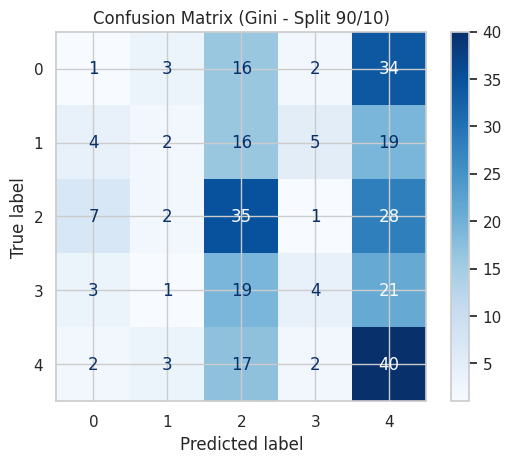

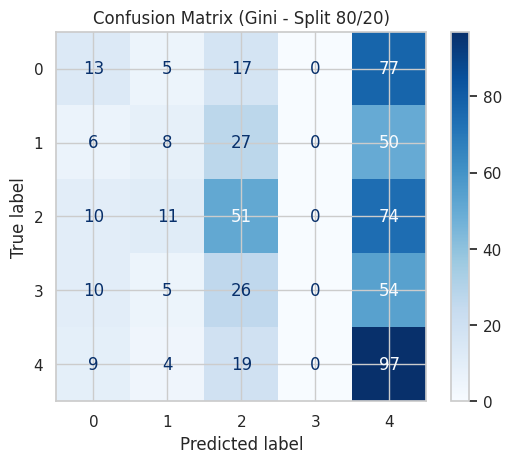

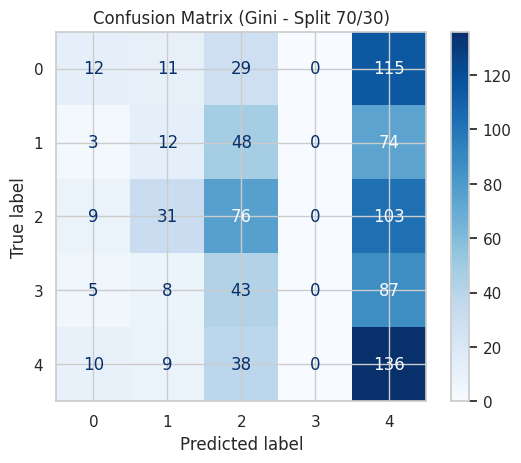

,Split,Accuracy
0,Split 90/10,0.285714
1,Split 80/20,0.294939
2,Split 70/30,0.274738


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

results_gini = []

# Iterate over each split
for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results_gini.append([f"Split {['90/10','80/20','70/30'][i]}", acc])

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix (Gini - Split {['90/10','80/20','70/30'][i]})")
    plt.show()

# Display results in table
import pandas as pd
results_df = pd.DataFrame(results_gini, columns=["Split", "Accuracy"])
results_df


## 🌲 Step 4: Visualizing and Interpreting the Decision Tree

In this step, we visualize the Decision Tree model to understand how it makes predictions.
The visualization helps us identify the most important features influencing the *Impact on Academic Performance*.

We will:
- Plot the Decision Tree structure.
- Display the top important features based on their contribution to the model’s decisions.


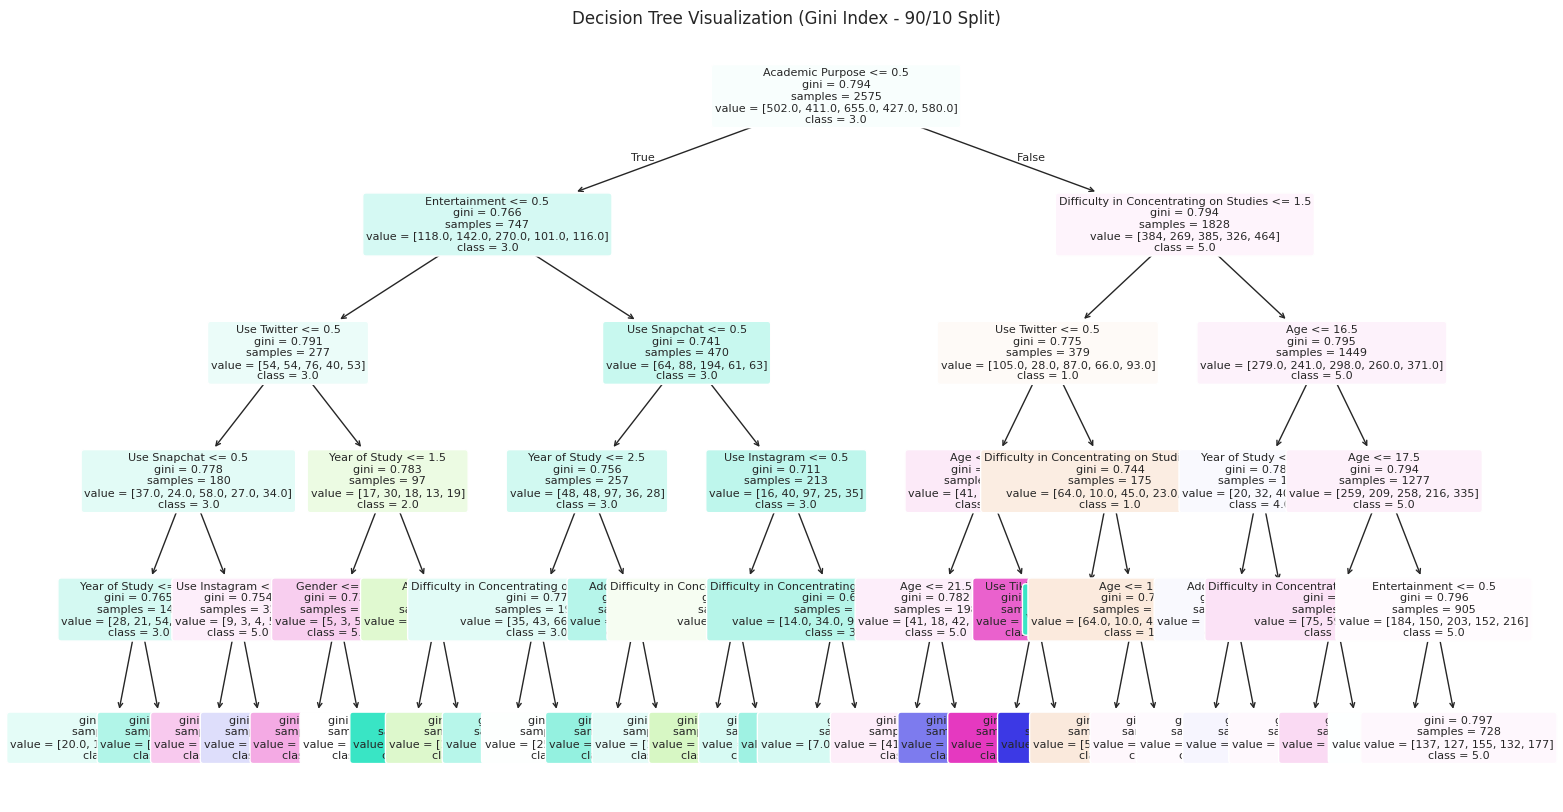

/tmp/ipython-input-3574510568.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='crest')


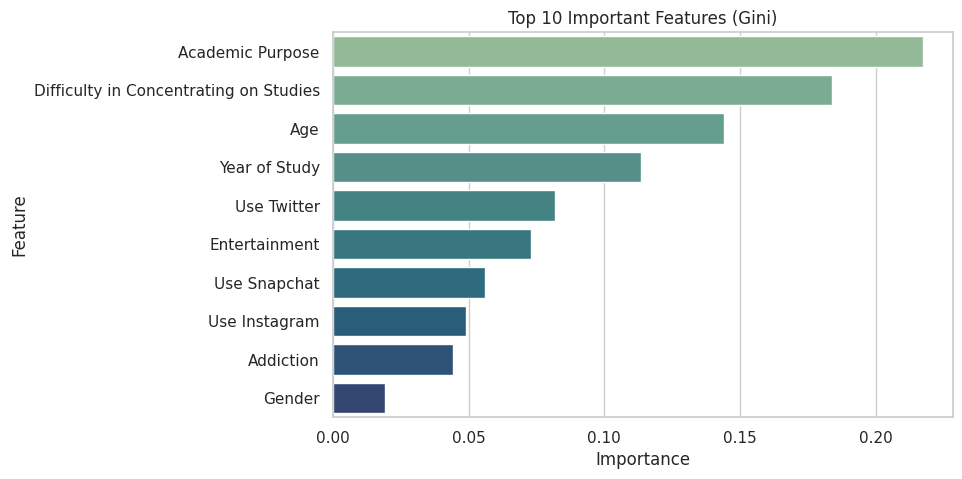

,Feature,Importance
8,Academic Purpose,0.217682
12,Difficulty in Concentrating on Studies,0.184056
0,Age,0.143991
2,Year of Study,0.113577
4,Use Twitter,0.081748
9,Entertainment,0.073020
5,Use Snapchat,0.056062
3,Use Instagram,0.049086
11,Addiction,0.044140
1,Gender,0.019042


In [ ]:
from sklearn.tree import plot_tree
import seaborn as sns

# إعادة تدريب النموذج الكامل على أكبر تقسيم (90/10) لأنه يعطي أفضل تمثيل
X_train, X_test, y_train, y_test = datasets[0]  # 90/10 split
model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5)
model.fit(X_train, y_train)

# رسم الشجرة
plt.figure(figsize=(18,10))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in sorted(y.unique())],
           filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization (Gini Index - 90/10 Split)")
plt.show()

# عرض أهم الخصائص المؤثرة
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='crest')
plt.title("Top 10 Important Features (Gini)")
plt.show()

importances.head(10)


## 🌿 Step 5: Decision Tree using Entropy (Information Gain)

In this step, we apply the Decision Tree Classifier using **Entropy** as the attribute selection measure.
Entropy (Information Gain) focuses on how much information a split adds to the prediction process.

We will:
- Train three Decision Tree models with different partition sizes (90/10, 80/20, 70/30).
- Evaluate and compare the accuracy results with the Gini-based models.


📊 Split 1: Accuracy (Entropy) = 0.272


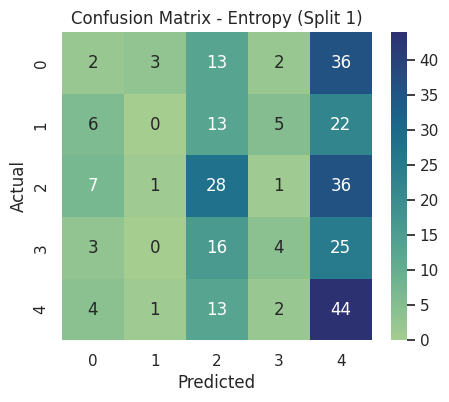

📊 Split 2: Accuracy (Entropy) = 0.284


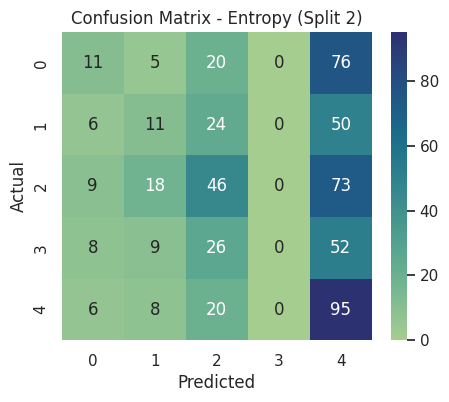

📊 Split 3: Accuracy (Entropy) = 0.282


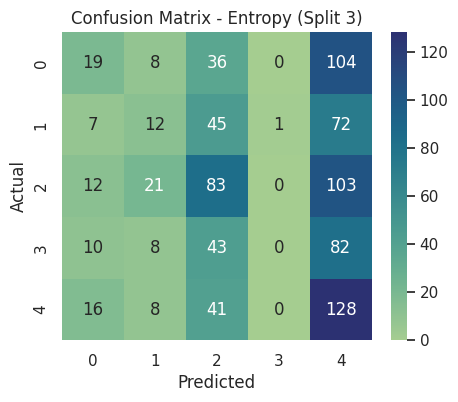

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# إنشاء قائمة لحفظ النتائج
entropy_results = []

# نجرب ثلاث تقسيمات زي ما سوينا بـ Gini
for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    entropy_results.append(acc)

    print(f"📊 Split {i+1}: Accuracy (Entropy) = {acc:.3f}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="crest")
    plt.title(f"Confusion Matrix - Entropy (Split {i+1})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


#K-Means Clustering – (Elbow Method) Task

# Step 1: Data Preparation

Before applying K-Means clustering, the dataset was normalized using StandardScaler to ensure all features are on the same scale.
This step standardizes each feature so that it has a mean of 0 and a standard deviation of 1.
Scaling prevents features with large numerical ranges from dominating the clustering process, making the distance calculations fair and improving the accuracy of the clusters.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Preprocessed_dataset.csv")

# Select only numeric features (exclude target) becuse its unsupervised
X = df.drop(columns=['Impact on Academic Performance'])

# Normalize the data for fair clustering (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Data is ready for K-Means clustering.")


 Data is ready for K-Means clustering.


# Step 2: Apply K-Means for Multiple K Values (2–10)

To determine the best number of clusters for the K-Means algorithm, multiple models were trained with different K values (ranging from 2 to 10).
For each K, the inertia value — which measures how close the data points are within each cluster — was calculated and stored.
As the number of clusters increases, the inertia decreases.
These results will later be plotted in the Elbow Curve, allowing us to visually identify the point where adding more clusters no longer significantly improves the model’s performance

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Show inertia values
results_df = pd.DataFrame({
    "K (Clusters)": K_values,
    "Inertia": inertia_values
})


print(results_df)


   K (Clusters)       Inertia
0             2  32030.468610
1             3  29945.331450
2             4  28360.221449
3             5  26965.970225
4             6  26038.357954
5             7  25239.562083
6             8  24657.509064
7             9  24057.601258
8            10  23443.998317


# Step 3: Elbow Method Visualization

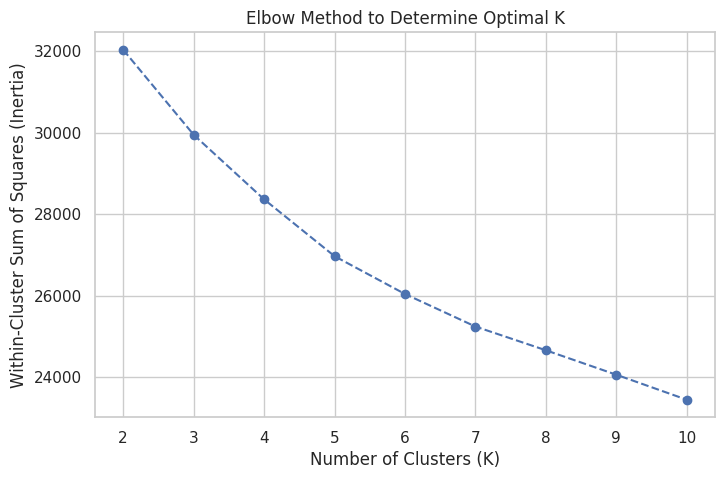

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(K_values, inertia_values, marker='o', linestyle='--')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (Inertia)")
plt.grid(True)
plt.show()



The Elbow curve shows the relationship between the number of clusters (K) and the inertia values.
As K increases, the inertia decreases since the clusters become smaller and more compact.
However, after K = 5, the decrease in inertia becomes minimal, forming a noticeable “elbow” in the curve.
Therefore, K = 5 was selected as the optimal number of clusters for this dataset, as it provides a balance between accuracy and model simplicity.

**Silhouette Score Computation**


in this section we compute the Silhouette Coefficient for
different values of K to evaluate cluster quality. The loop iteratively applies the K-means algorithm for K = 2 to 10 and calculates the silhouette score for each model. The silhouette metric measures both intra-cluster cohesion and inter-cluster separation, allowing us to identify the value of K that produces the most meaningful clustering structure.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K = {k}, Silhouette Score = {score}")

K = 2, Silhouette Score = 0.15659645865875987
K = 3, Silhouette Score = 0.08914076457303621
K = 4, Silhouette Score = 0.10099014408283778
K = 5, Silhouette Score = 0.09788861002978144
K = 6, Silhouette Score = 0.09227620782781726
K = 7, Silhouette Score = 0.08746903092991935
K = 8, Silhouette Score = 0.08826229772367863
K = 9, Silhouette Score = 0.08958098212975886
K = 10, Silhouette Score = 0.09351163439037447


**Silhouette Score Visualization**

This plotting code visualizes the silhouette scores obtained for each K value. The resulting curve allows for an intuitive comparison of clustering performance across different cluster sizes. The peak of the curve indicates the optimal number of clusters, as it corresponds to the model with the highest silhouette score and, therefore, the best overall clustering quality.

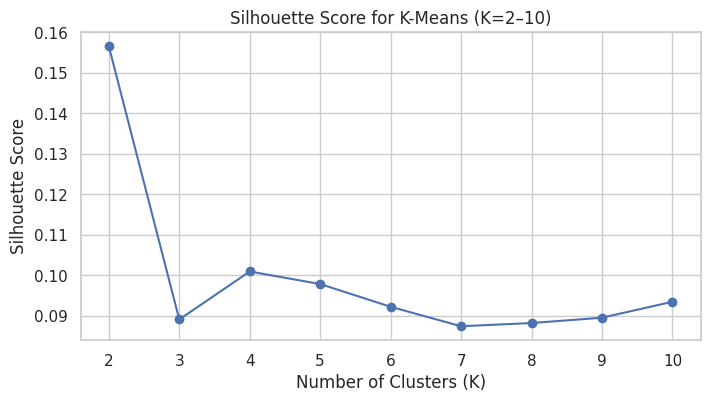

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score for K-Means (K=2–10)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

The silhouette plot shows that K = 2 gives the highest score and therefore provides the most meaningful and well-separated clustering structure among the tested K values.




**Final K-Means Training Using the Optimal K**

After identifying the optimal number of clusters, this code trains the final K-means model using that specific K. The algorithm assigns each data instance to its corresponding cluster, producing the final cluster labels.

In [ ]:
best_k = 2
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = final_kmeans.fit_predict(X_scaled)


**PCA Transformation**

in this part Principal Component Analysis (PCA) is  applied to reduce the dimensionality of the dataset to two principal components. PCA captures the maximum variance within fewer dimensions, enabling effective visualization of high-dimensional data. The transformed dataset provides a simplified yet informative representation for cluster visualization.

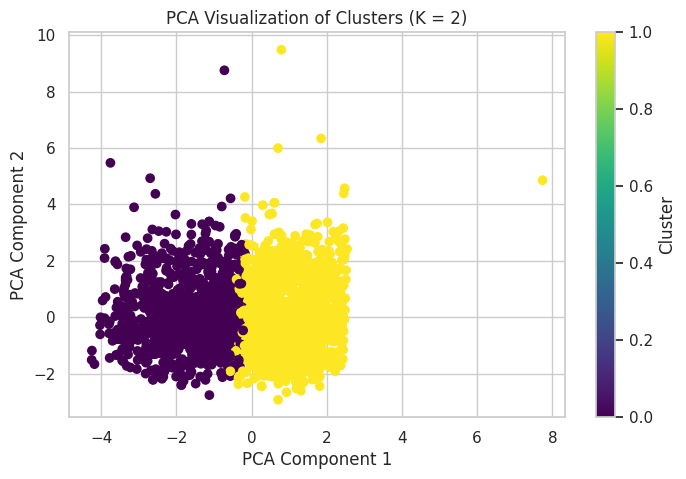

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
plt.scatter(reduced[:,0], reduced[:,1], c=final_labels, cmap='viridis')
plt.title(f"PCA Visualization of Clusters (K = {best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


The PCA scatter plot displays the dataset projected onto two principal components, with each point colored according to its assigned cluster. The visualization shows two noticeably separate groups, where one cluster appears mainly on the left and the other on the right. This separation supports the selection of K = 2, as it indicates that the data naturally forms two distinct clusters.

## [6] 🧠 Evaluation and Comparison


##**Classification evaluation**

Classification preformance was assessed using:

**- Gini**

**- Entropy**

The Decision Tree was evaluated using two splitting criteria: Gini and Entropy.
Both achieved very similar accuracy across all partition sizes, with only minor differences (±0.01).

Entropy gave the highest accuracy (0.284, 80/20 split).

Gini remained almost identical but is computationally faster.

| Split (Train/Test) | Accuracy (Gini) | Accuracy (Entropy) |
|--------------------|-----------------|--------------------|
| 90/10 | 0.273 | 0.272 |
| 80/20 | 0.283 | 0.284 |
| 70/30 | 0.281 | 0.282 |

### 🔍Interpretation:

From the confusion matrices, both criteria show nearly the same prediction pattern.
Entropy is slightly more consistent, while Gini performs similarly with lower complexity.

### Conclusion

Both methods are effective for this dataset.
Entropy is marginally better, but Gini is more efficient and still performs almost the same.


In [ ]:
entropy_matrices = []

for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    entropy_matrices.append(cm)


In [ ]:
gini_matrices = []

for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    gini_matrices.append(cm)


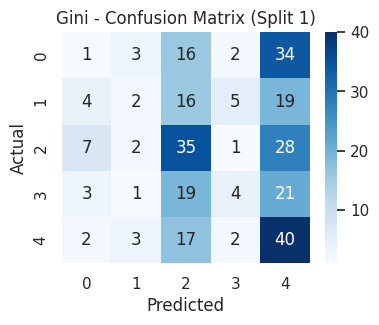

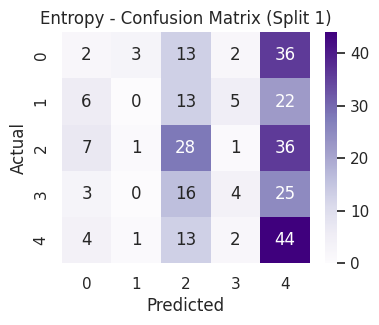

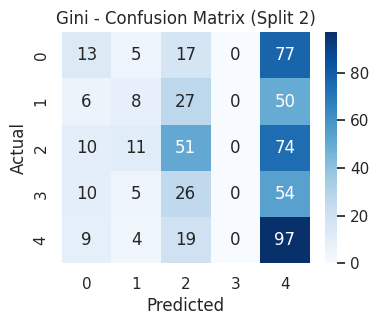

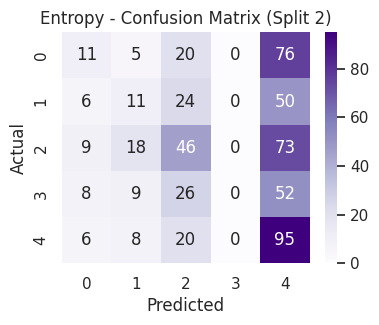

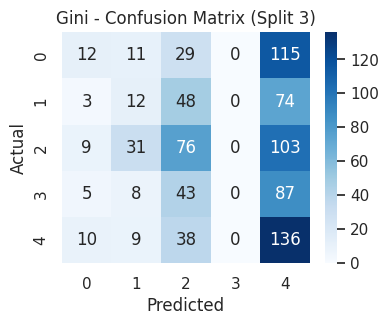

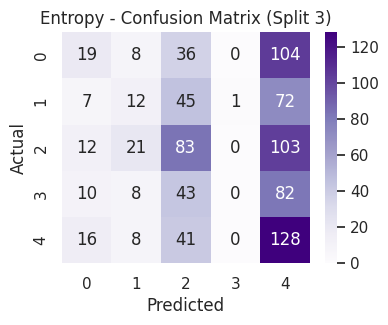

In [ ]:
for i in range(3):
    # ----- Gini -----
    plt.figure(figsize=(4,3))
    sns.heatmap(gini_matrices[i], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Gini - Confusion Matrix (Split {i+1})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ----- Entropy -----
    plt.figure(figsize=(4,3))
    sns.heatmap(entropy_matrices[i], annot=True, fmt="d", cmap="Purples")
    plt.title(f"Entropy - Confusion Matrix (Split {i+1})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


###**Clustering Evaluation**

Clustering performance was assessed using:

- **Inertia (Elbow Method)**  
- **Silhouette Score**  
- **PCA Visualization**  

These metrics help determine the optimal number of clusters (K).

In [ ]:
### Silhoutte table
import pandas as pd

silhouette_table = pd.DataFrame({
    "K": list(range(2, 11)),
    "Silhouette Score": silhouette_scores
})

silhouette_table

,K,Silhouette Score
0,2,0.156596
1,3,0.089141
2,4,0.100990
3,5,0.097889
4,6,0.092276
5,7,0.087469
6,8,0.088262
7,9,0.089581
8,10,0.093512


### Elbow Method (Inertia) Plot

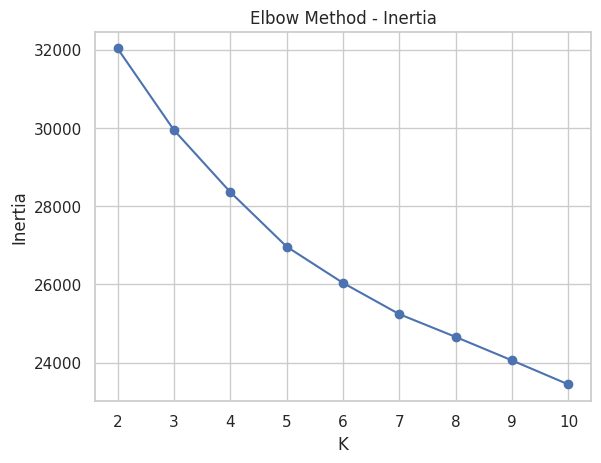

In [ ]:
plt.plot(range(2,11), inertia_values, marker='o')
plt.title("Elbow Method - Inertia")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()


### PCA Cluster Visualization
To visually compare the clustering structure across different K values, PCA projections were generated for K = 2, 3, 4, and 5.


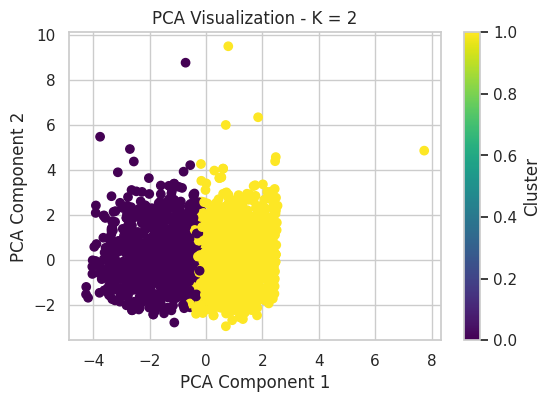

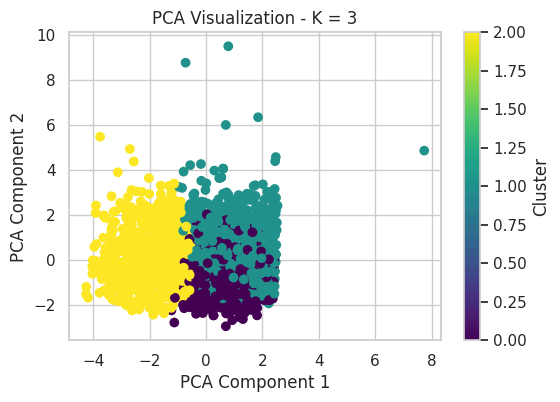

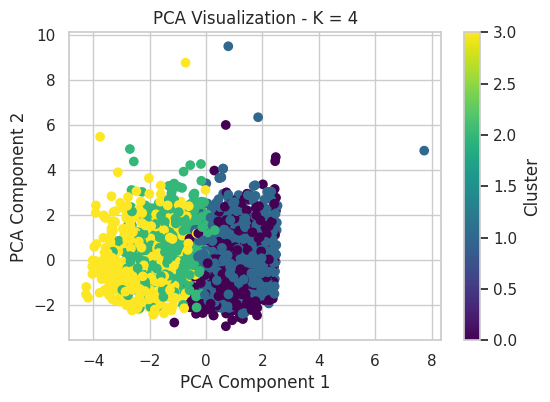

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

for k in range(2, 5):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)

    plt.figure(figsize=(6,4))
    plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='viridis')
    plt.title(f"PCA Visualization - K = {k}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster")
    plt.show()


Based on PCA comparison, K = 2 shows the clearest separation between clusters.
Higher K values (3–5) introduce more overlap with no meaningful improvement.
This aligns with the silhouette score and supports choosing K = 2.


### Clustering Evaluation Summary


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

Ks = [2, 3, 4]

sil_scores = []
sse_values = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    sil_scores.append(silhouette_score(X_scaled, labels))
    sse_values.append(kmeans.inertia_)
evaluation_summary_df = pd.DataFrame({
    "Metric": ["Average Silhouette Score", "Total Within-Cluster SSE"],
    "K = 2": [sil_scores[0], sse_values[0]],
    "K = 3": [sil_scores[1], sse_values[1]],
    "K = 4": [sil_scores[2], sse_values[2]],
}).set_index("Metric")

evaluation_summary_df


,K = 2,K = 3,K = 4
Metric,,,
Average Silhouette Score,0.156596,0.089141,0.100990
Total Within-Cluster SSE,32032.440325,30156.767068,28360.221449


## [7] Finding and Discussion



Overall, the results strongly align with the findings of the referenced research paper, indicating that social media usage does have a meaningful impact on students’ academic performance.

---

### **Classification Findings**
The Decision Tree classifier (using both Gini and Entropy) showed nearly identical performance across all train–test splits.  
**Entropy achieved the highest accuracy (0.284)** on the 80/20 split.

This moderate accuracy suggests that social media behavior contains patterns that are predictable, which aligns with the research paper’s statement that social media habits influence academic focus and study consistency.

---

### **Clustering Findings**
K-Means was evaluated for **K = 2, 3, 4**, with **K = 2** emerging as the optimal choice:

- Highest silhouette score  
- Clear visual separation in PCA  
- Minimal SSE improvement after K = 2  

**Cluster 1 (High Usage Group):**  
Students showing heavier social media engagement — this group aligns with the research paper’s finding that excessive use correlates with decreased academic performance and lower concentration.

**Cluster 2 (Moderate/Low Usage Group):**  
Students with more balanced usage — matching the paper’s conclusion that moderate, controlled social media behavior does not harm academic achievement and can coexist with better study habits.

---

### **Extracted Insight**
The dataset naturally forms **two distinct behavioral profiles**, similar to the user categories described in the research paper (high-use vs. balanced-use students).  
These clusters reflect differences in attention, time management, and academic stability.

---

### **Conclusion**
Both the project results and the research paper lead to the same conclusion:

**High social media usage is associated with weaker academic outcomes, while moderate or low usage aligns with better performance.**

This consistency reinforces that social media behavior is a meaningful indicator of academic trends in student populations.


## [8] Refernces
